# Review of Diferential Equations and Numerical Methods

## Numerical Methods - Euler

Consider the following differential equation:

$\frac{d}{dx}y(x) + y(x) = \sin \pi x ~~~(1)$


Utilizing (2) and (3):

$\frac{d}{dx}y(x) \approx  \frac{y(x+h)-y(x)}{h} ~~~(2)$

$\frac{d}{dx}y(x) \approx  \frac{y(x)-y(x-h)}{h} ~~~(3)$


Adding equations (2) and (3), we obtain:

$\frac{y(x+h)-y(x)}{h} + \frac{y(x)-y(x-h)}{h} = \frac{y(x+h)-y(x-h)}{h} \approx 2 \frac{d}{dx}y(x) ~~~(4)$


Therefore,

$\frac{d}{dx}y(x) \approx \frac{y(x+h)-y(x-h)}{2h} ~~~(5)$

#### Solution:


Substituting the approximation into equation (1):


$\frac{d}{dx}y(x) + y(x) = \sin \pi x$


$\frac{y(x+h)-y(x-h)}{2h} + y(x) = \sin \pi x$


Solving for $ y(x+h) $:


$y(x+h) = 2h \left ( \sin \pi x - y(x) \right ) + y(x-h) ~~~(6)$ 

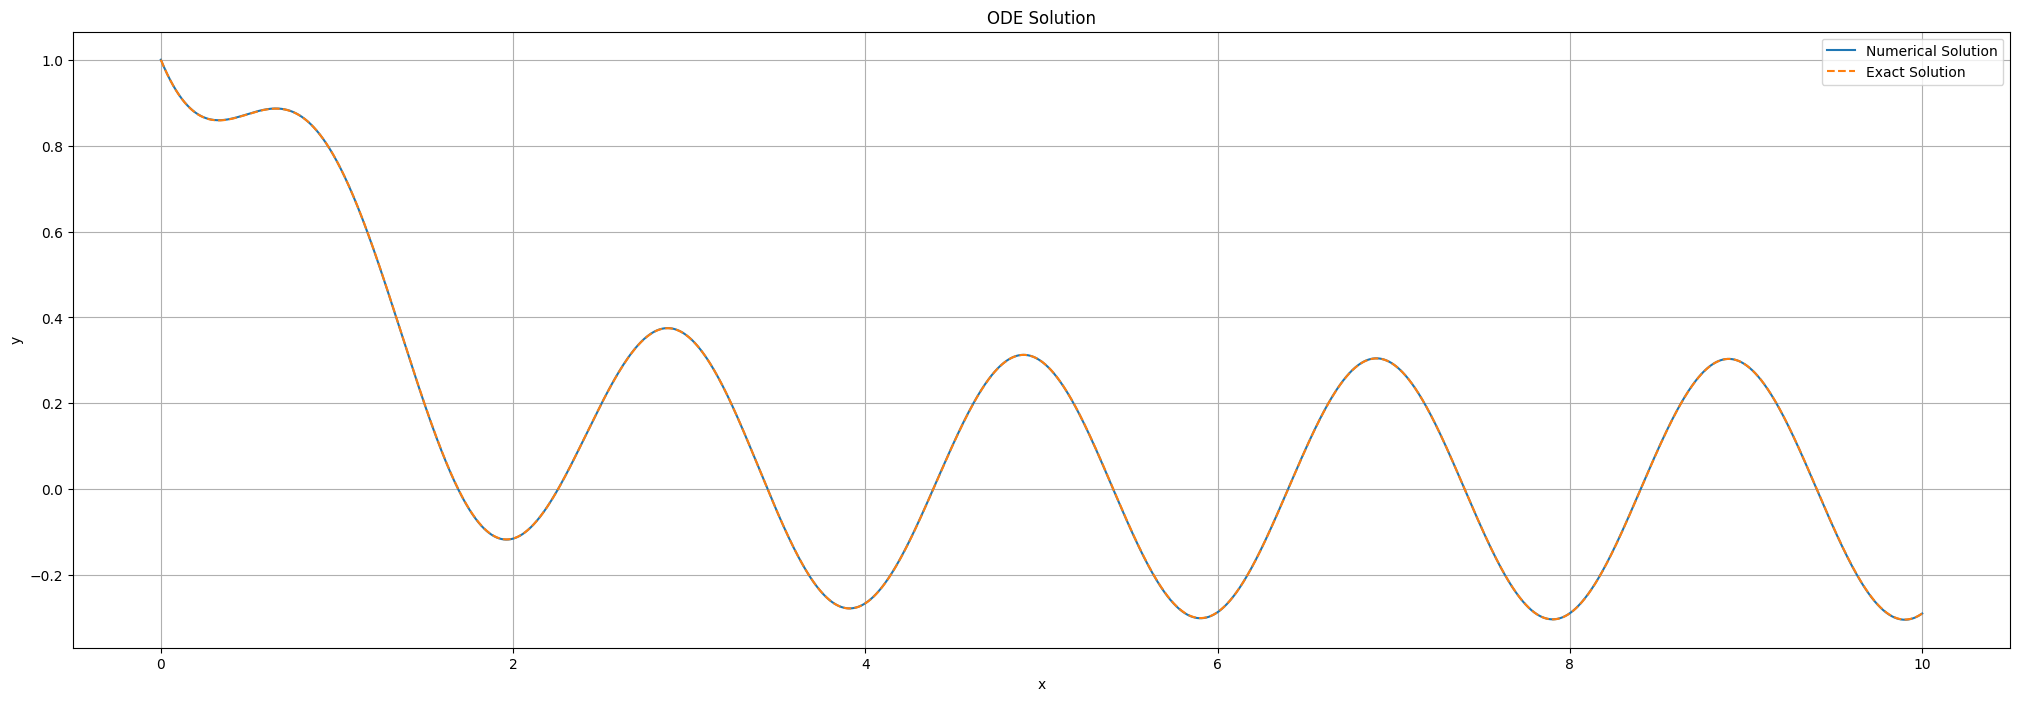

In [1]:
from numericalmethods import NumericalMethods
import numpy as np
import matplotlib.pyplot as plt



#ODE: y' + y = sin(pi*x)
g = lambda x: np.sin(np.pi * x)
y0 = 1
k0 = 1
k1 = 1
nm = NumericalMethods(y0, k0, k1, g)

h = 0.001
t = (0, 10)
x_values, y_values = nm.solve_ode_eq_4(h, t)

#Exact Solution
K = 1 - ((-1*np.pi)/(1+np.pi**2))
y_exact = lambda x: ((np.sin(np.pi*x)-np.pi*np.cos(np.pi*x))/(1+np.pi**2) + K*np.exp(-1*x))
y_exact_values = y_exact(x_values)


plt.figure(figsize=(25, 8))
plt.plot(x_values, y_values, label="Numerical Solution")
plt.plot(x_values, y_exact_values, label="Exact Solution", linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("ODE Solution")
plt.legend()
plt.grid()
plt.show()

# Phase Plane

[Phase Plane - Summary](../Notes/Phase_plane_Summary.pdf)

[Phase Plane - Examples](../Notes/Phase_Plane.pdf)


### Class Examples (12/08/2025)


In [2]:
import numpy as np

# Exercicios Semana 4

#EDO: y'' + w²y = 0

def EDO_ex_4(omega, y): #y'' = -w²y
    return (-1)*(omega**2)*y

def aprox_valor_medio_v1(y, omega, h, i): #yn-1 = y[i-2] | yn = y[i-1]
    #y'' = (yn+1 - 2yn + yn-1)/h²
    #Aproximando numericamente yn+1 (y1)
    return (EDO_ex_4(omega, y[i-1])*(h**2) + 2*y[i-1] - y[i-2])  #v1: yn = yn


def aprox_valor_medio_v2(y, omega, h, i): #yn-1 = y[i-2] | yn = y[i-1]
    #y'' = (yn+1 - 2yn + yn-1)/h²
    #Aproximando numericamente yn+1 (y1)
    return (EDO_ex_4(omega, y[i-1])*(h**2) + 2*y[i-1] - y[i-1])  #v2: yn = yn-1

def aprox_valor_medio_v3(y, omega, h, i): #yn-1 = y[i-2] | yn = y[i-1]
    #y'' = (yn+1 - 2yn + yn-1)/h²
    #Aproximando numericamente yn+1 (y1)
    return ((-1)*y[i-2])*(3+(omega**2)*(h**2)) #v3: yn = yn+1

def aprox_numericamente(intervalo, y0, omega):
    # y0 = [y(0), y'(0)]
    resultado = np.zeros(len(intervalo))
    resultado[0] = y0[0] # Armazenando o valor inicial
    h = intervalo[1] - intervalo[0]  # Passo de discretização
    # Aproximando y1 com Taylor
    resultado[1] = y0[0] + h * y0[1] + (h**2 / 2) * EDO_ex_4(omega, y0[0])
    # Aproximando os demais valores
    for i in range(2, len(intervalo)):
        resultado[i] = aprox_valor_medio_v1(resultado, omega, h, i) # Alterar para v1, v2 ou v3 para testar yn = yn-1, yn ou yn+1
    return resultado

In [3]:
aprox_numericamente(np.arange(0, 10, 0.1), [1,1], 2) #y0 = [y(0), y'(0)] = [1, 0] -> y(0) = 1

array([ 1.        ,  1.08      ,  1.1168    ,  1.108928  ,  1.05669888,
        0.9622018 ,  0.82921666,  0.66306284,  0.47038652,  0.25889473,
        0.03704715, -0.18628231, -0.40216048, -0.60195223, -0.7776659 ,
       -0.92227292, -1.02998903, -1.09650558, -1.1191619 , -1.09705175,
       -1.03105953, -0.92382493, -0.77963733, -0.60426424, -0.40472057,
       -0.18898809,  0.03430392,  0.25622377,  0.46789467,  0.66084979,
        0.82737091,  0.9607972 ,  1.0557916 ,  1.10855433,  1.11697489,
        1.08071646,  1.00122936,  0.8816931 ,  0.72688911,  0.54300955,
        0.33740961,  0.11831329, -0.10551556, -0.32512379, -0.53172707,
       -0.71706127, -0.87371302, -0.99541624, -1.07730282, -1.11609728,
       -1.11024785, -1.05998851, -0.96732963, -0.83597756, -0.67118639,
       -0.47954776, -0.26872723, -0.0471576 ,  0.17629833,  0.39270232,
        0.59339823,  0.7703582 ,  0.91650385,  1.02598934,  1.09443526,
        1.11910377,  1.09900812,  1.03495216,  0.9294981 ,  0.78

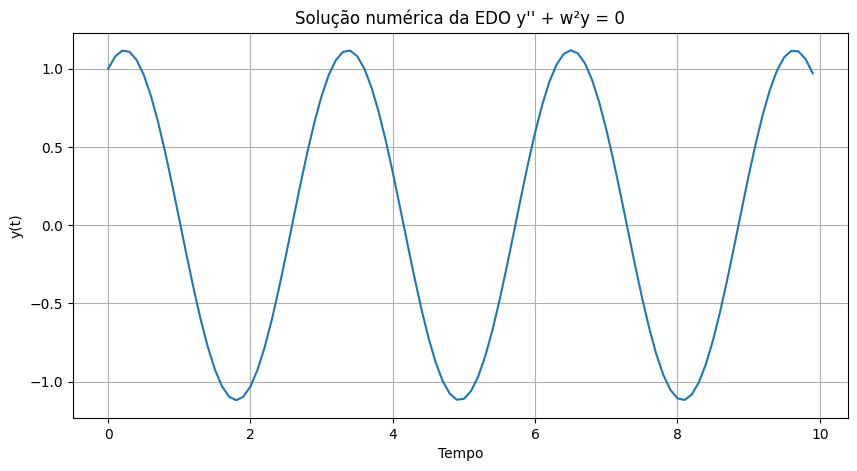

In [4]:
#Plotar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10, 0.1), aprox_numericamente(np.arange(0, 10, 0.1), [1, 1], 2))
plt.title('Solução numérica da EDO y\'\' + w²y = 0')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.grid()
plt.show()

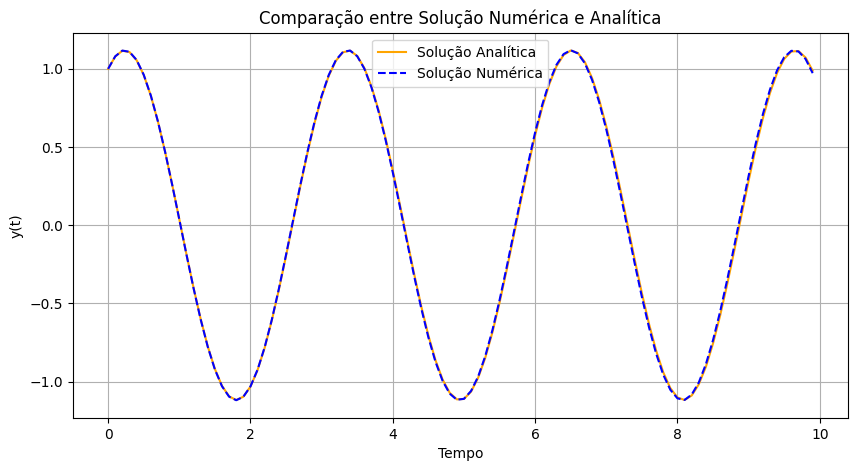

In [5]:
#Solução analítica
def solucao_analitica(t, y0, omega):
    # y(t) = K0*cos(omega*t) + K1*sen(omega*t)
    # y(0) = K0, y'(0) = K1*omega
    K0 = y0[0]
    K1 = y0[1] / omega
    return K0 * np.cos(omega * t) + K1 * np.sin(omega * t)

# Plotar solução analítica
t = np.arange(0, 10, 0.1)
plt.figure(figsize=(10, 5))
plt.plot(t, solucao_analitica(t, [1, 1], 2), label='Solução Analítica', color='orange')
plt.plot(t, aprox_numericamente(t, [1, 1], 2), label='Solução Numérica', color='blue', linestyle='--')
plt.title('Comparação entre Solução Numérica e Analítica')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Considerando ERRO = C*h^r, vamos determinar o valor de r
# Testando a aproximação com diferentes valores de h
valores_h = [0.01, 0.02, 0.03, 0.04, 0.05]
erro = np.zeros(len(valores_h))
for i, hx in enumerate(valores_h):
    intervalo = np.arange(0, 10, hx)
    y0 = [1, 1]  # Condições iniciais
    resultado_numerico = aprox_numericamente(intervalo, y0, 2)
    resultado_analitico = solucao_analitica(intervalo, y0, 2)
    erro[i] = np.sqrt(np.mean((resultado_numerico - resultado_analitico)**2))  # Erro quadrático médio
    

In [7]:
r = []

for i in range(1, len(erro)):
    r.append(np.log(erro[i-1] / erro[i]) / np.log(valores_h[i-1] / valores_h[i]))

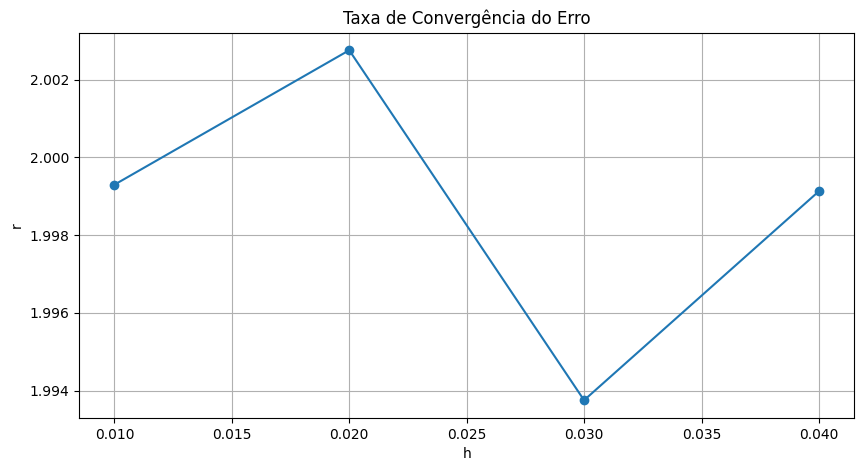

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(valores_h[:-1], r, marker='o')
plt.title('Taxa de Convergência do Erro')
plt.xlabel('h')
plt.ylabel('r')
plt.grid()
plt.show()

In [9]:
def aprox_valor_medio_v4(y, omega, h, i): #yn-1 = y[i-2] | yn = y[i-1]
    #y'' = (yn+1 - 2yn + yn-1)/h²
    #Aproximando numericamente yn+1 (y1)
    return ((y[i-1]*((-1)*2*(omega**2)*(h**2) + 8) + y[i-2]*((-1)*(omega**2)*(h**2) - 4))/(4 + ((omega**2)*(h**2))))  #v1: yn = yn




In [10]:
def aprox_numericamente_4pontos(intervalo, y0, omega):
    # y0 = [y(0), y'(0)]
    resultado = np.zeros(len(intervalo))
    resultado[0] = y0[0] # Armazenando o valor inicial
    h = intervalo[1] - intervalo[0]  # Passo de discretização
    # Aproximando y1 com Taylor
    resultado[1] = y0[0] + h * y0[1] + (h**2 / 2) * EDO_ex_4(omega, y0[0])
    # Aproximando os demais valores
    for i in range(2, len(intervalo)):
        resultado[i] = aprox_valor_medio_v4(resultado, omega, h, i) # Alterar para v1, v2 ou v3 para testar yn = yn-1, yn ou yn+1
    return resultado

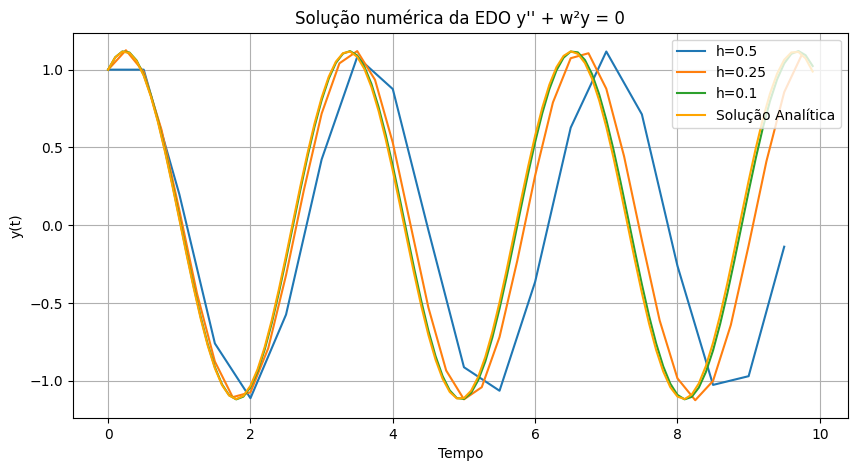

In [11]:
t = np.arange(0, 10, 0.1)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10, 0.5), aprox_numericamente_4pontos(np.arange(0, 10, 0.5), [1, 1], 2), label ='h=0.5')
plt.plot(np.arange(0, 10, 0.25), aprox_numericamente_4pontos(np.arange(0, 10, 0.25), [1, 1], 2), label ='h=0.25')
plt.plot(np.arange(0, 10, 0.1), aprox_numericamente_4pontos(np.arange(0, 10, 0.1), [1, 1], 2), label ='h=0.1')
plt.plot(t, solucao_analitica(t, [1, 1], 2), label='Solução Analítica', color='orange')
plt.title('Solução numérica da EDO y\'\' + w²y = 0')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='upper right')
plt.show()

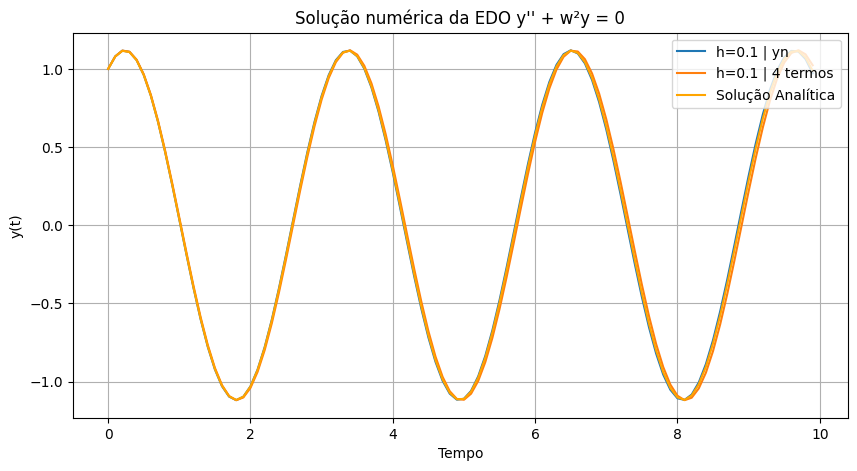

In [12]:
t = np.arange(0, 10, 0.1)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10, 0.1), aprox_numericamente(np.arange(0, 10, 0.1), [1, 1], 2), label ='h=0.1 | yn')
plt.plot(np.arange(0, 10, 0.1), aprox_numericamente_4pontos(np.arange(0, 10, 0.1), [1, 1], 2), label ='h=0.1 | 4 termos')

plt.plot(t, solucao_analitica(t, [1, 1], 2), label='Solução Analítica', color='orange')
plt.title('Solução numérica da EDO y\'\' + w²y = 0')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [13]:
# Considerando ERRO = C*h^r, vamos determinar o valor de r
# Testando a aproximação com diferentes valores de h
valores_h = [0.01, 0.02, 0.03, 0.04, 0.05]
erro = np.zeros(len(valores_h))
for i, hx in enumerate(valores_h):
    intervalo = np.arange(0, 10, hx)
    y0 = [1, 1]  # Condições iniciais
    resultado_numerico = aprox_numericamente(intervalo, y0, 2)
    resultado_analitico = solucao_analitica(intervalo, y0, 2)
    erro[i] = np.sqrt(np.mean((resultado_numerico - resultado_analitico)**2))  # Erro quadrático médio
    

In [14]:
r = []

for i in range(1, len(erro)):
    r.append(np.log(erro[i-1] / erro[i]) / np.log(valores_h[i-1] / valores_h[i]))

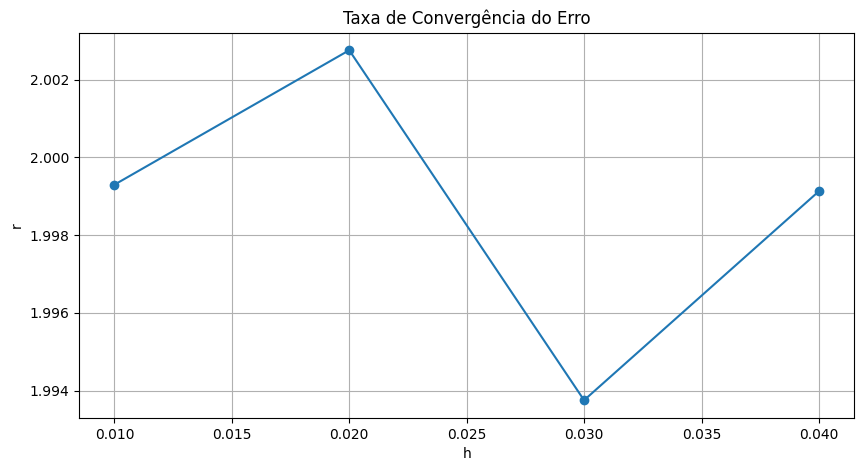

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(valores_h[:-1], r, marker='o')
plt.title('Taxa de Convergência do Erro')
plt.xlabel('h')
plt.ylabel('r')
plt.grid()
plt.show()